In [ ]:
# https://blog.keras.io/building-autoencoders-in-keras.html

In [ ]:
'''
this one is simple auto encoder, without padding
'''

In [ ]:
import os

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

# root_path = r'gdrive/My Drive/work/research/AutoEncoder_classification/'  #change dir to your project folder

# os.chdir(root_path)

In [42]:
from tensorflow.keras.datasets import cifar10

import numpy as np

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout
from tensorflow.keras.layers import MaxPooling2D, MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import load_model
from sklearn.metrics import precision_recall_fscore_support
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
import matplotlib.pyplot as plt
import cv2

### 01 Get the data

In [10]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_train])
x_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_test])

print(x_train.shape)

x_train = x_train.astype('float32') / 255.
rows=x_train.shape[1]
cols=x_train.shape[2]
x_train=x_train.reshape(len(x_train),rows,cols,1)

x_test = x_test.astype('float32') / 255.
rows=x_test.shape[1]
cols=x_test.shape[2]
x_test=x_test.reshape(len(x_test),rows,cols,1)


(50000, 32, 32)


In [11]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(50000, 32, 32, 1) (50000, 1)
(10000, 32, 32, 1) (10000, 1)


### 02 Create and train the model

In [16]:
input_img = keras.Input(shape=x_train[0].shape)





x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)

encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu',padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)

decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [17]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 16)        160       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 8)         1160      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 8)           584       
_________________________________________________________________
up_sampling2d_5 (UpSampling2 (None, 16, 16, 8)         0   

In [19]:
history=autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/100
391/391 [==============================] - 16s 40ms/step - loss: 0.5716 - val_loss: 0.5723
Epoch 2/100
391/391 [==============================] - 15s 39ms/step - loss: 0.5712 - val_loss: 0.5719
Epoch 3/100
391/391 [==============================] - 15s 40ms/step - loss: 0.5709 - val_loss: 0.5716
Epoch 4/100
391/391 [==============================] - 16s 40ms/step - loss: 0.5706 - val_loss: 0.5715
Epoch 5/100
391/391 [==============================] - 16s 40ms/step - loss: 0.5704 - val_loss: 0.5712
Epoch 6/100
391/391 [==============================] - 15s 39ms/step - loss: 0.5701 - val_loss: 0.5709
Epoch 7/100
391/391 [==============================] - 16s 40ms/step - loss: 0.5699 - val_loss: 0.5707
Epoch 8/100
391/391 [==============================] - 15s 39ms/step - loss: 0.5698 - val_loss: 0.5707
Epoch 9/100
391/391 [==============================] - 15s 39ms/step - loss: 0.5696 - val_loss: 0.5707
Epoch 10/100
391/391 [==============================] - 15s 39ms/step - l

Epoch 80/100
391/391 [==============================] - 11s 27ms/step - loss: 0.5670 - val_loss: 0.5678
Epoch 81/100
391/391 [==============================] - 11s 29ms/step - loss: 0.5669 - val_loss: 0.5678
Epoch 82/100
391/391 [==============================] - 11s 28ms/step - loss: 0.5669 - val_loss: 0.5678
Epoch 83/100
391/391 [==============================] - 11s 28ms/step - loss: 0.5669 - val_loss: 0.5679
Epoch 84/100
391/391 [==============================] - 11s 28ms/step - loss: 0.5669 - val_loss: 0.5678
Epoch 85/100
391/391 [==============================] - 11s 27ms/step - loss: 0.5669 - val_loss: 0.5678
Epoch 86/100
391/391 [==============================] - 11s 28ms/step - loss: 0.5669 - val_loss: 0.5678
Epoch 87/100
391/391 [==============================] - 11s 27ms/step - loss: 0.5669 - val_loss: 0.5677
Epoch 88/100
391/391 [==============================] - 11s 28ms/step - loss: 0.5669 - val_loss: 0.5677
Epoch 89/100
391/391 [==============================] - 11s 28ms

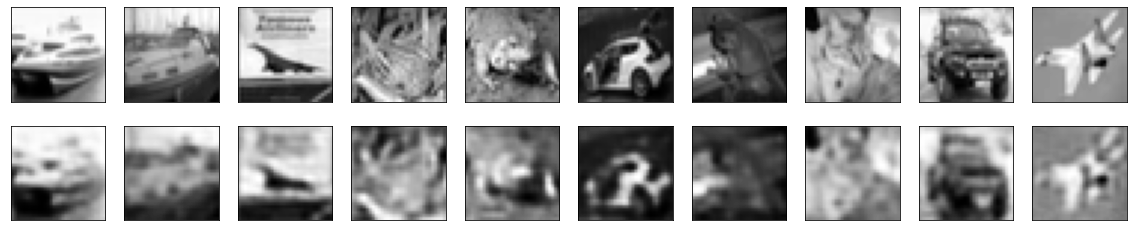

In [20]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [21]:
autoencoder.save("models/autoenc_simple.h")

INFO:tensorflow:Assets written to: models/autoenc_simple.h/assets


In [22]:
y_test[0]

array([3], dtype=uint8)

#### 02a Save the encoder part

In [23]:
encoder = Model(inputs=input_img, outputs=encoded)
encoder.save('models/encoder_simple.h5')

### 03 Test encoded images with a LogReg

In [24]:
def flatten_encoded_images_for_logreg(X_array):
    print(X_array.shape)
    X_array_flattened=[]
    for i in range(X_array.shape[0]):
        X_array_flattened.append(X_array[i].flatten())
    X_array_flattened=np.array(X_array_flattened)
    print("Shape is ",X_array_flattened.shape)
    return X_array_flattened

In [25]:
# load the model from file
encoder = load_model('models/encoder_simple.h5')
# encode the train data
x_train_encode = encoder.predict(x_train)
x_train_encode_flat=flatten_encoded_images_for_logreg(x_train_encode)

# x_train_encode=x_train_encode.flatten()
print("Shape of encoded flat",x_train_encode_flat.shape)
# encode the test data
x_test_encode = encoder.predict(x_test)
x_test_encode_flat=flatten_encoded_images_for_logreg(x_test_encode)
print("Shape of encoded flat",x_test_encode.shape)



(50000, 8, 8, 8)
Shape is  (50000, 512)
Shape of encoded flat (50000, 512)
(10000, 8, 8, 8)
Shape is  (10000, 512)
Shape of encoded flat (10000, 8, 8, 8)


In [26]:
# define the model
model = LogisticRegression()
# fit the model on the training set
model.fit(x_train_encode_flat, y_train)
# make predictions on the test set
yhat = model.predict(x_test_encode_flat)
# calculate classification accuracy
acc = accuracy_score(y_test, yhat)
print(acc)

/lustre/gfxhome/asislam25/.conda/envs/venv_vasic_gpu/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.4002


/lustre/gfxhome/asislam25/.conda/envs/venv_vasic_gpu/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### 04 Test encoded images with a CNN

In [ ]:
# https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5

#### 04a Convert y values to categorical

In [27]:
#one-hot encode target column
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
print(y_train_one_hot.shape,y_test_one_hot.shape)

(50000, 10) (10000, 10)


#### 04b Extract features using encoder

In [28]:
# load the model from file
encoder = load_model('models/encoder_simple.h5')
# encode the train data
x_train_encode = encoder.predict(x_train)
print("Shape of training encoded images",x_train_encode.shape)

# encode the test data
x_test_encode = encoder.predict(x_test)
print("Shape of testing encoded images",x_test_encode.shape)


Shape of training encoded images (50000, 8, 8, 8)
Shape of testing encoded images (10000, 8, 8, 8)


In [29]:
print(x_train_encode[0].shape,x_test_encode[1].shape)

(8, 8, 8) (8, 8, 8)


### 04c create a CNN that takes encoded image as input

In [43]:
def get_model(x_train):
    # define a CNN to make the predictions
    #create model
    model = Sequential()#add model layers
    model.add(Conv2D(24, kernel_size=5, padding="same", activation='relu', input_shape=x_train[0].shape))
    model.add(MaxPool2D())
    model.add(Conv2D(48, kernel_size=5, padding="same", activation='relu'))
    model.add(MaxPool2D())
    model.add(Conv2D(64, kernel_size=5, padding="same", activation='relu'))
    model.add(MaxPool2D(padding='same'))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    #compile model using accuracy to measure model performance
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])    
    return model
    
# from: https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/
def define_model_VGG3(x_train):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=x_train[0].shape))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [44]:
acc_list=[]
for i in range(10):
    model=get_model(x_train_encode)
    # print(model.summary())
    #train the model
    num_epochs=100
    history=model.fit(x_train_encode, y_train_one_hot, validation_data=(x_test_encode, y_test_one_hot), epochs=num_epochs,verbose=0)
    loss,acc=model.evaluate(x_test_encode, y_test_one_hot)
    print("Accuracy is ",acc)
    acc_list.append(acc)


313/313 [==============================] - 1s 2ms/step - loss: 2.5591 - accuracy: 0.4600
Accuracy is  0.46000000834465027
313/313 [==============================] - 1s 3ms/step - loss: 2.8204 - accuracy: 0.4738
Accuracy is  0.47380000352859497
313/313 [==============================] - 1s 3ms/step - loss: 2.6938 - accuracy: 0.4563
Accuracy is  0.4562999904155731
313/313 [==============================] - 1s 3ms/step - loss: 2.5869 - accuracy: 0.4638
Accuracy is  0.46380001306533813
313/313 [==============================] - 1s 2ms/step - loss: 2.7664 - accuracy: 0.4485
Accuracy is  0.44850000739097595
313/313 [==============================] - 1s 3ms/step - loss: 2.6544 - accuracy: 0.4692
Accuracy is  0.4691999852657318
313/313 [==============================] - 1s 3ms/step - loss: 2.7370 - accuracy: 0.4676
Accuracy is  0.4675999879837036
313/313 [==============================] - 1s 3ms/step - loss: 2.4158 - accuracy: 0.4785
Accuracy is  0.47850000858306885
313/313 [==================

In [48]:
print(sum(acc_list)/len(acc_list))


0.46283999979496004


In [40]:
acc_list

[0.5860000252723694,
 0.5889000296592712,
 0.5878000259399414,
 0.5914000272750854,
 0.5978000164031982,
 0.5898000001907349,
 0.5996999740600586,
 0.5795999765396118,
 0.589900016784668,
 0.597100019454956]

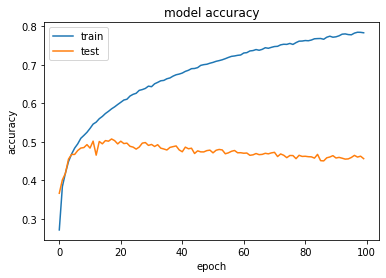

In [47]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()